# Telco Customer Churn Prediction

## Introduction


The churn rate, also known as the **rate of attrition or customer churn**, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.This project studies the case of Customers Churning which is very common in Telecommunication companies.**Churn analysis** is the evaluation of a company’s customer loss rate in order to reduce it. Also referred to as customer attrition rate. It's important because keeping an existing customer saves more money to the company than attracting a new one. Churn rate has strong impact on the life time value of the customer because it affects the length of service and the future revenue of the company.

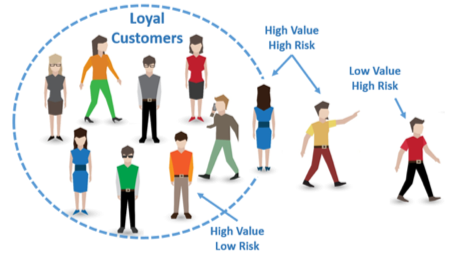

## Deliverables of the Project 

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.In this project,I intend to find out the most striking behavior of customers through EDA and later on use of the predictive modelling techniques using **Logistic Regression & K-NN** to determine the customers who are most likely to churn within a certain period of time.As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

## Objective

To create a classification filter (Using **Logistics Regression & KNN Classification Algorithm**) to determine Churn from Telecom dataset. Compare the performance of the filters.

## Dataset Source

**Link: https://www.kaggle.com/mnassrib/telecom-churn-datasets**

## Software 

***Anaconda Navigator & Jupyter Notebook***

## Reference

**https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113**
  
**https://towardsdatascience.com/machine-learning-case-study-telco-customer-churn-prediction-bc4be03c9e1d**
  
**https://www.kaggle.com/code/hanantabak/churning-eda-prediction-and-clustering/notebook**
  
**https://medium.com/swlh/telco-churn-prediction-ad95a3a67454**


## Individual Details

**Name:** Vinoth Kumar



**E-Mail:** vinothvk1211@gmail.com

**Phone:** 8056644595

### Essential Libraries

**NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 

**Pandas** is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

**Matplotlib** is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Scikit-learn** (formerly scikits.learn and also known as **sklearn**) is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

## Loading Libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Data Overview

In [2]:
df = pd.read_csv('C:\\Users\\vinot\\Downloads\\IITR Project\\Telecom churn train.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [6]:
df.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.026327,-0.011993,0.017833,0.035703,0.017839,0.027043,0.021237,0.027051,-0.007527,0.027228,-0.007528,0.002362,0.031279,0.002456,-0.027677,0.012315
Area code,-0.026327,1.000000,-0.006907,0.051507,-0.008972,0.051492,0.017160,0.017783,0.017182,-0.016832,0.036421,-0.016818,-0.037980,-0.010530,-0.038044,0.000103,0.027129
Number vmail messages,-0.011993,-0.006907,1.000000,-0.069172,-0.009952,-0.069187,0.040865,-0.051951,0.040876,0.039751,0.003367,0.039680,0.029949,-0.036847,0.029999,0.007859,-0.102381
Total day minutes,0.017833,0.051507,-0.069172,1.000000,-0.032306,1.000000,0.017987,0.043219,0.017945,-0.031600,0.052761,-0.031603,-0.006725,0.016597,-0.006841,0.029291,0.242781
Total day calls,0.035703,-0.008972,-0.009952,-0.032306,1.000000,-0.032319,-0.004688,0.005851,-0.004664,0.079536,-0.030074,0.079529,-0.015319,-0.005155,-0.015201,-0.045953,0.019360
Total day charge,0.017839,0.051492,-0.069187,1.000000,-0.032319,1.000000,0.017983,0.043231,0.017941,-0.031613,0.052748,-0.031616,-0.006720,0.016582,-0.006836,0.029290,0.242777
Total eve minutes,0.027043,0.017160,0.040865,0.017987,-0.004688,0.017983,1.000000,-0.029077,1.000000,-0.007705,0.001938,-0.007603,-0.027855,0.002929,-0.027887,-0.012213,0.175614
Total eve calls,0.021237,0.017783,-0.051951,0.043219,0.005851,0.043231,-0.029077,1.000000,-0.029089,-0.009856,0.036068,-0.009833,-0.001050,0.074829,-0.001152,0.008126,0.055669
Total eve charge,0.027051,0.017182,0.040876,0.017945,-0.004664,0.017941,1.000000,-0.029089,1.000000,-0.007691,0.001939,-0.007589,-0.027863,0.002894,-0.027895,-0.012212,0.175616
Total night minutes,-0.007527,-0.016832,0.039751,-0.031600,0.079536,-0.031613,-0.007705,-0.009856,-0.007691,1.000000,0.005209,0.999999,-0.041969,-0.057212,-0.042221,-0.067602,0.042930


In [7]:
df.shape

(667, 20)

In [8]:
df.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

**The data set includes information about:**

**1. Customers who left within the last month** -- the column is called 'Churn'.

**2. Telecom plan,charges and usage by each customer in various state** -- 'State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'.

## Exploratory Data Analysis

**Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques.** It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

### Steps Involved in Exploratory Data Analysis

**1. Data Collection:** is an essential part of exploratory data analysis. It refers to the process of finding and loading data into our system. Good, reliable data can be found on various public sites or bought from private organizations. Some reliable sites for data collection are Kaggle, Github, Machine Learning Repository, etc.

**2. Data Cleaning:** is an process of removing unwanted variables and values from your dataset and getting rid of any irregularities in it. Such anomalies can disproportionately skew the data and hence adversely affect the results.

**3. Univariate Analysis:** In Univariate Analysis, you analyze data of just one variable. A variable in your dataset refers to a single feature/ column. You can do this either with graphical or non-graphical means by finding specific mathematical values in the data.

**4. Bivariate Analysis:** is a process of comparing two variables. This way, you can find how one feature affects the other. It is done with scatter plots, which plot individual data points or correlation matrices that plot the correlation in hues. You can also use boxplots.

In [9]:
df["State"].nunique()

51

In [10]:
df["State"].value_counts()

AZ    19
ND    18
WV    18
NJ    18
KS    18
NM    18
WA    18
RI    17
ID    17
MS    17
WI    17
TX    17
IN    17
LA    16
NE    16
OR    16
KY    16
VT    16
NY    15
MI    15
MT    15
CT    15
AL    14
MN    14
MA    13
IL    13
ME    13
NH    13
TN    12
UT    12
NC    12
MO    12
OH    12
SD    11
WY    11
SC    11
CA    10
DE    10
VA    10
MD    10
FL     9
AK     9
DC     9
HI     9
PA     9
OK     9
AR     8
CO     7
IA     6
NV     5
GA     5
Name: State, dtype: int64

In [11]:
print('The percentage of customers churning from the company is: %{}'.format((df['Churn'].sum()) *100/df.shape[0]) )

The percentage of customers churning from the company is: %14.24287856071964


## Data Visualization

**The process of finding trends and correlations in our data by representing it pictorially** is called Data Visualization. To perform data visualization in python, we can use various python data visualization modules such as Matplotlib, Seaborn, Plotly, etc.

<AxesSubplot:xlabel='State', ylabel='Churn'>

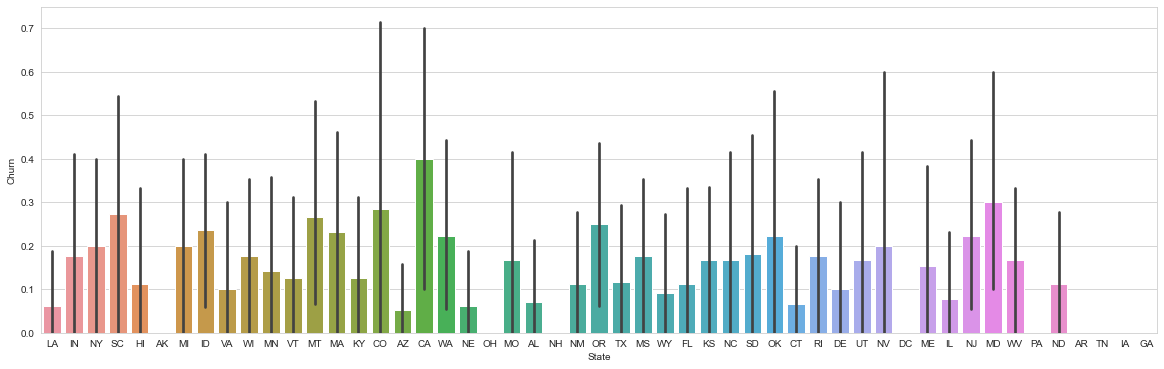

In [12]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State',y='Churn', data=df)

<AxesSubplot:xlabel='Churn', ylabel='Customer service calls'>

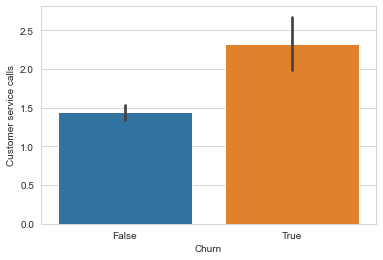

In [13]:
sns.barplot(x='Churn', y='Customer service calls',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Account length'>

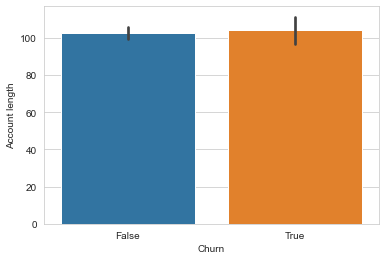

In [14]:
sns.barplot(x='Churn', y='Account length',data=df)

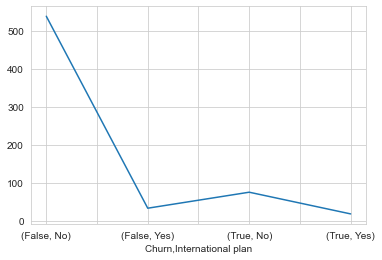

In [15]:
churn_intl = df.groupby(['Churn','International plan']).size()
churn_intl.plot()
plt.show()

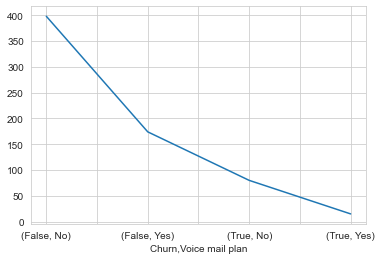

In [16]:
churn_voicem = df.groupby(['Churn','Voice mail plan']).size()
churn_voicem.plot()
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='Total charge'>

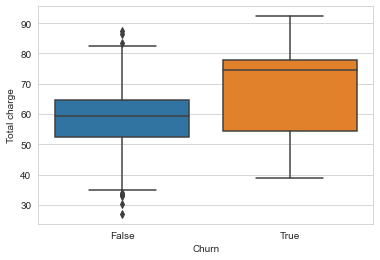

In [17]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']
sns.boxplot(x='Churn',y='Total charge', data = df)

## Data Preprocessing

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a **technique that is used to convert the raw data into a clean data set.**

In [18]:
df['International plan'].replace(['No','Yes'],[0,1],inplace=True)

def bool_to_int(dataframe_series):
    if dataframe_series.dtype=='bool':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [19]:
df = df.apply(lambda x: bool_to_int(x))
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,LA,117,408,0,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,0,73.32
1,IN,65,415,0,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,1,54.20
2,NY,161,415,0,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,1,92.29
3,SC,111,415,0,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,0,41.05
4,HI,49,510,0,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,0,49.60


<AxesSubplot:>

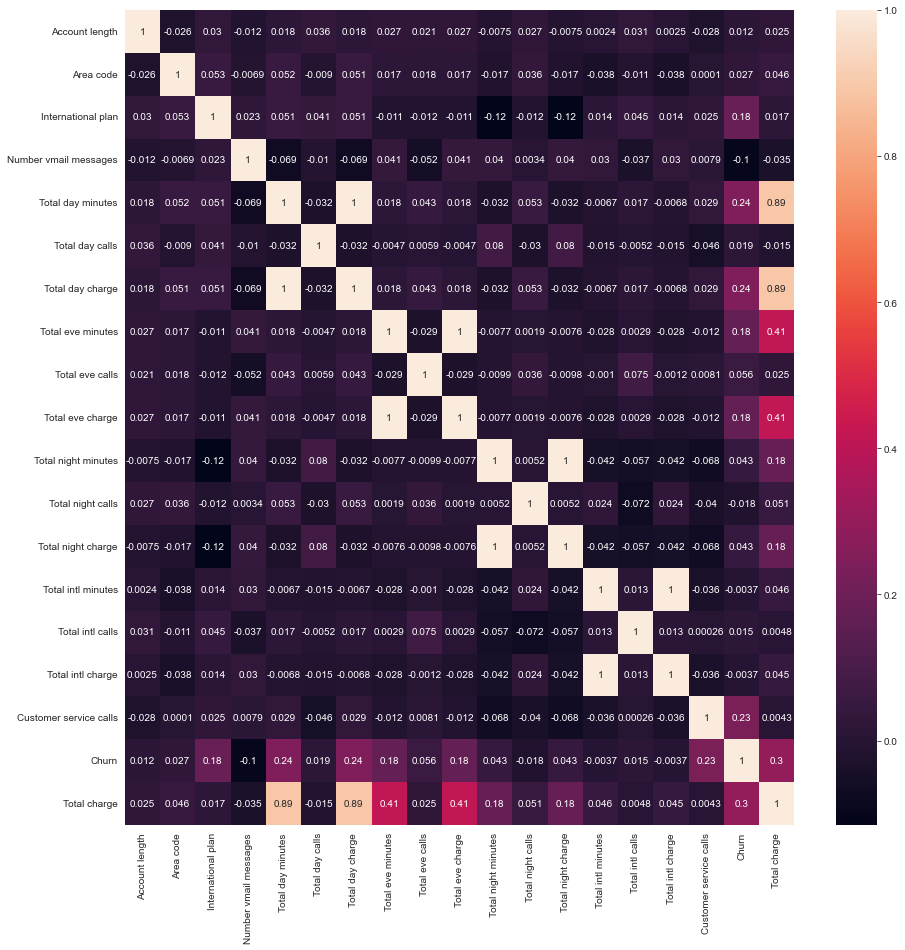

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr() , annot =True)

We can notice that: Some features are correlated to each other (have a high coefficient with each other).

'Total day calls' and 'Total day charge' for example are directly related because their coeff is 1, so we'll delete one of them. I choose to delete all the columns with the minutes count because they are redundant.

In [21]:
df=df.drop(['Total day calls','Total eve calls','Total night calls', 'Total intl calls'], axis=1)

In [22]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Customer service calls,Churn,Total charge
0,LA,117,408,0,No,0,184.5,31.37,351.6,29.89,215.8,9.71,8.7,2.35,1,0,73.32
1,IN,65,415,0,No,0,129.1,21.95,228.5,19.42,208.8,9.40,12.7,3.43,4,1,54.20
2,NY,161,415,0,No,0,332.9,56.59,317.8,27.01,160.6,7.23,5.4,1.46,4,1,92.29
3,SC,111,415,0,No,0,110.4,18.77,137.3,11.67,189.6,8.53,7.7,2.08,2,0,41.05
4,HI,49,510,0,No,0,119.3,20.28,215.1,18.28,178.7,8.04,11.1,3.00,1,0,49.60


Now, we'll select the best features that have the highest correlation with the target 'Churn'.

In [23]:
features = ['International plan','Total intl charge','Customer service calls']
x = df[features]
y = df['Churn']

In [24]:
x.shape

(667, 3)

In [25]:
y.shape

(667,)

## Model Selection,Evaluation & Prediction

Model selection is the **process of selecting one final machine learning model from among a collection of candidate machine learning models for a training dataset.** Model selection is a process that can be applied both across different types of models (e.g. logistic regression, SVM, KNN, etc.)

Model Evaluation is the **process through which we quantify the quality of a system's predictions.** To do this, we measure the newly trained model performance on a new and independent dataset. This model will compare labeled data with it's own predictions.

 Predictive modeling is a **statistical technique using machine learning and data mining to predict and forecast likely future outcomes with the aid of historical and existing data.** It works by analyzing current and historical data and projecting what it learns on a model generated to forecast likely outcomes.

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [27]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((533, 3), (134, 3), (533,), (134,))

## Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is **used for predicting the categorical dependent variable using a given set of independent variables.** Logistic regression predicts the output of a **categorical dependent variable.**

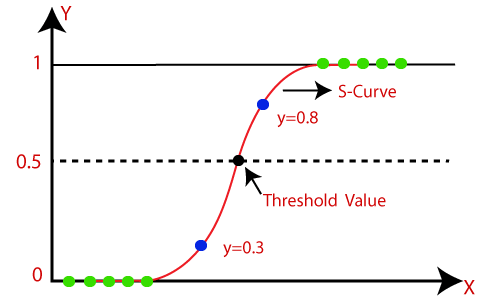

Threshold Value means a **value or range of values that allows for an assessment of the quality level achieved for a particular criterion,** thereby contributing to the assessment of the extent to which good environmental status is being achieved.

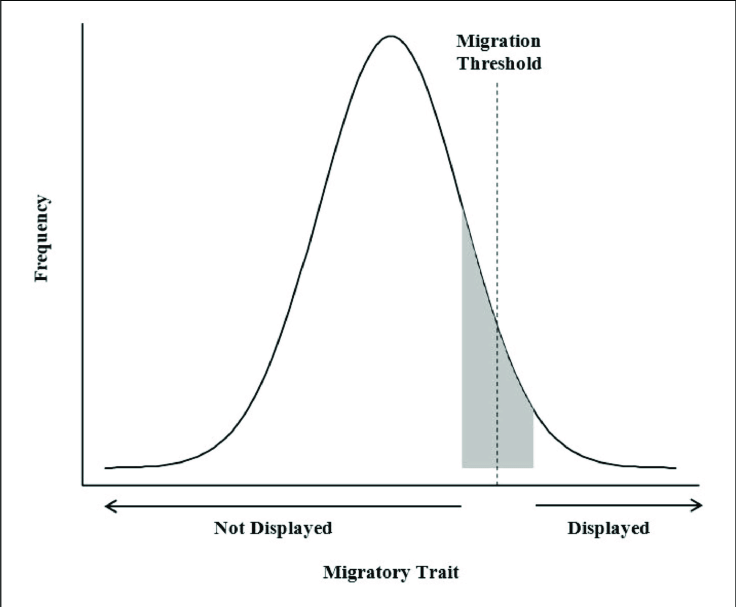

In [28]:
LR=LogisticRegression().fit(xtrain,ytrain)

In [29]:
LR.intercept_

array([-2.31540636])

In [30]:
LR.coef_

array([[ 1.20138506, -0.0998716 ,  0.41478617]])

In [31]:
LR.score(xtest,ytest)

0.8880597014925373

In [32]:
LR_pred= LR.predict(xtest)
report = classification_report(ytest,LR_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       121
           1       0.00      0.00      0.00        13

    accuracy                           0.89       134
   macro avg       0.45      0.49      0.47       134
weighted avg       0.81      0.89      0.85       134



In [33]:
print("Accuracy Score is:")
print(accuracy_score(ytest,LR_pred))

Accuracy Score is:
0.8880597014925373


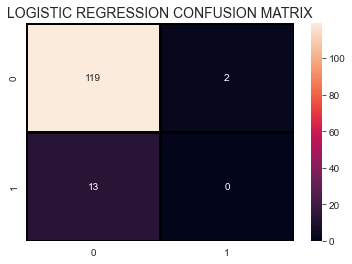

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest, LR_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

## K-Nearest Neighbors

The k-nearest neighbors (KNN) algorithm is **a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.** It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

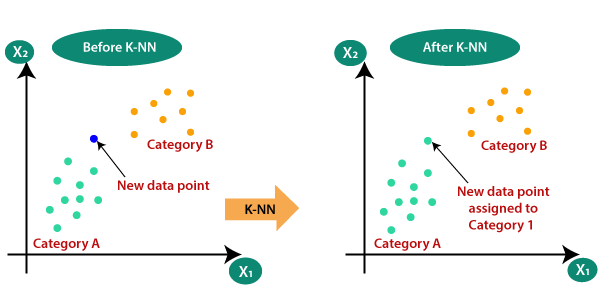

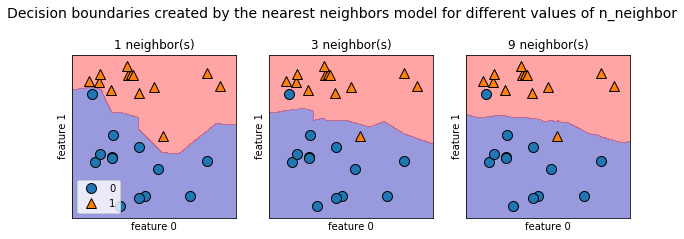

In [35]:
chosen_model = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7]}
grid = GridSearchCV(estimator= chosen_model, param_grid=param, cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'n_neighbors': 7}


In [36]:
best_model = KNeighborsClassifier(n_neighbors=6)
best_model.fit(xtrain,ytrain)
KNN_pred = best_model.predict(xtest)

In [37]:
print("Accuracy Score is:")
print(accuracy_score(ytest, KNN_pred))

Accuracy Score is:
0.9104477611940298


In [38]:
print("Classification Report:")
print(classification_report(ytest,KNN_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       121
           1       0.60      0.23      0.33        13

    accuracy                           0.91       134
   macro avg       0.76      0.61      0.64       134
weighted avg       0.89      0.91      0.89       134



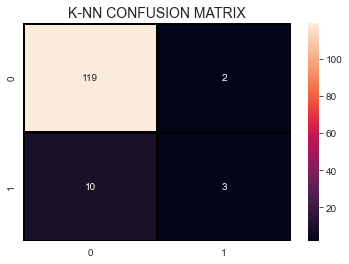

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest, KNN_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("K-NN CONFUSION MATRIX",fontsize=14)
plt.show()

**KNeighboursClassifier** model got highest score compared to **Logistic Regression**, hence it will be chosen.Here,we had choosen the best n_neighbours parameter by using Grid Search which is a class used to fine-tune the model to get the best results.

## Conclusion

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.